### 1. Importing Dataset and Libraries


In [1]:
# 1. Importing And Loading Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math


from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


warnings.filterwarnings('ignore')
df_original = pd.read_csv("ForestCoverType.csv",encoding='utf-8')  # Replace with actual file name if different
df=df_original.copy()
df.reset_index(drop=True,inplace=True)

#only showing first 5 rows
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### 2.Cleaning Forest Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

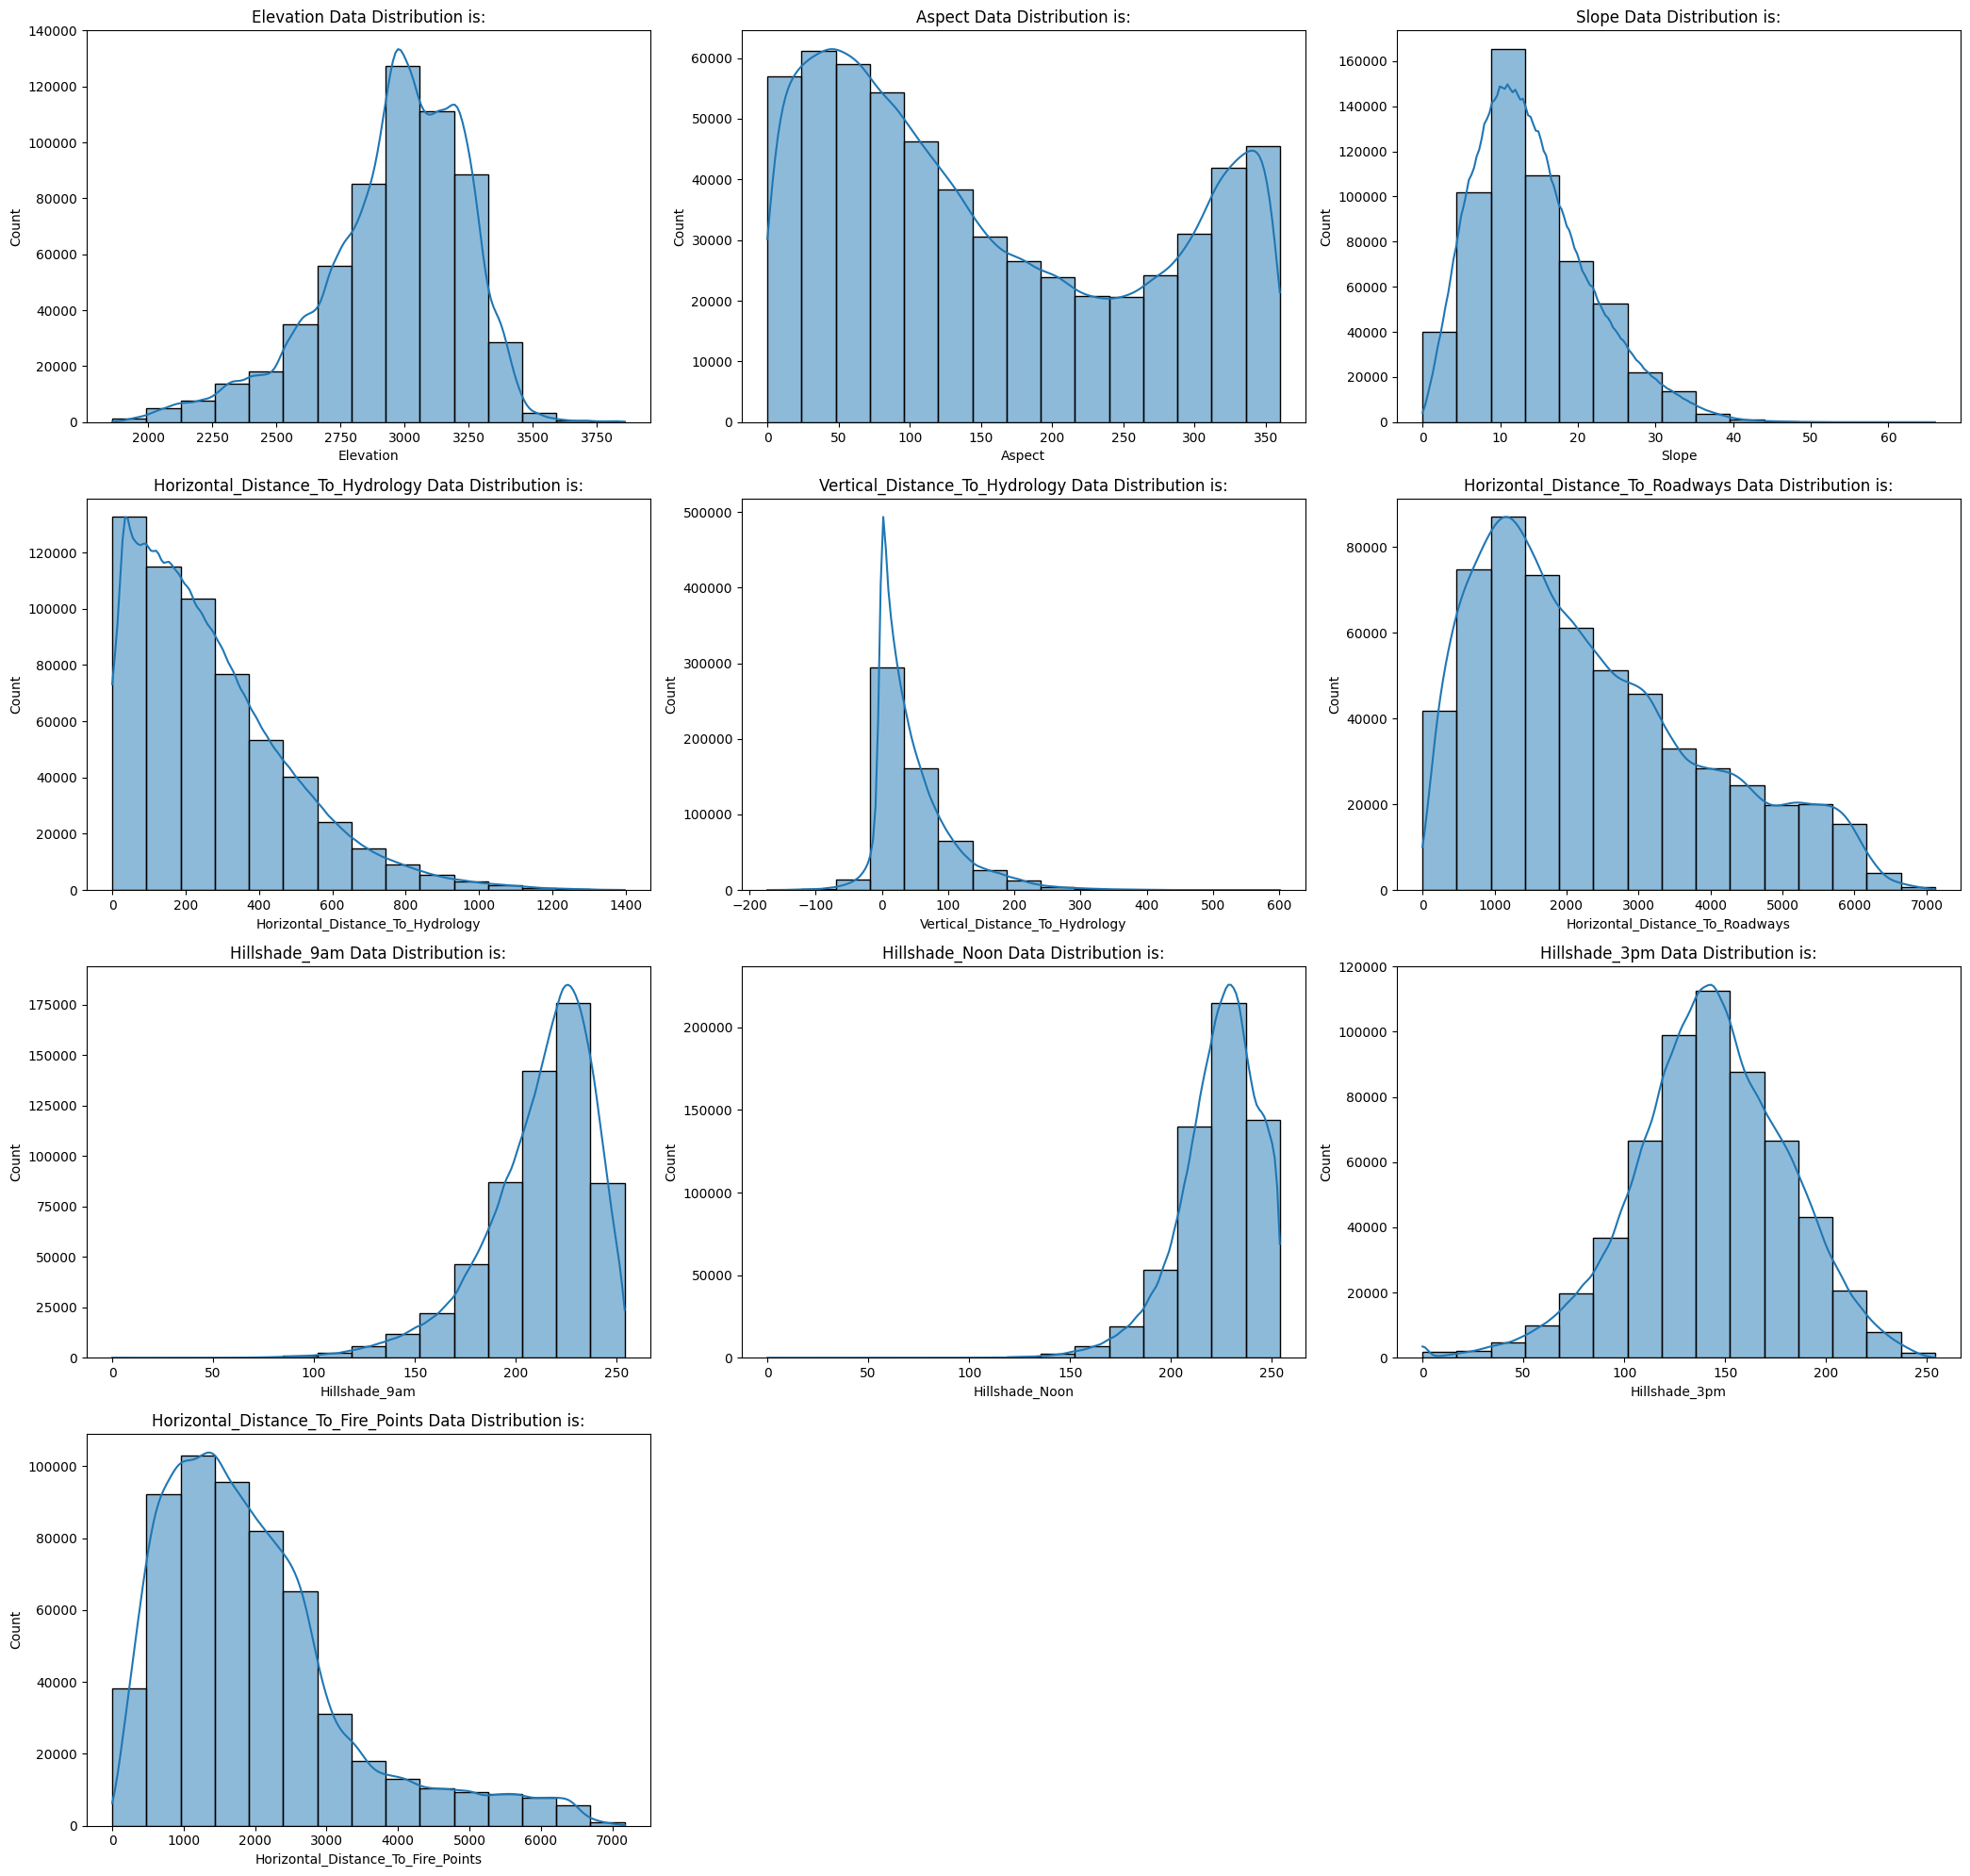

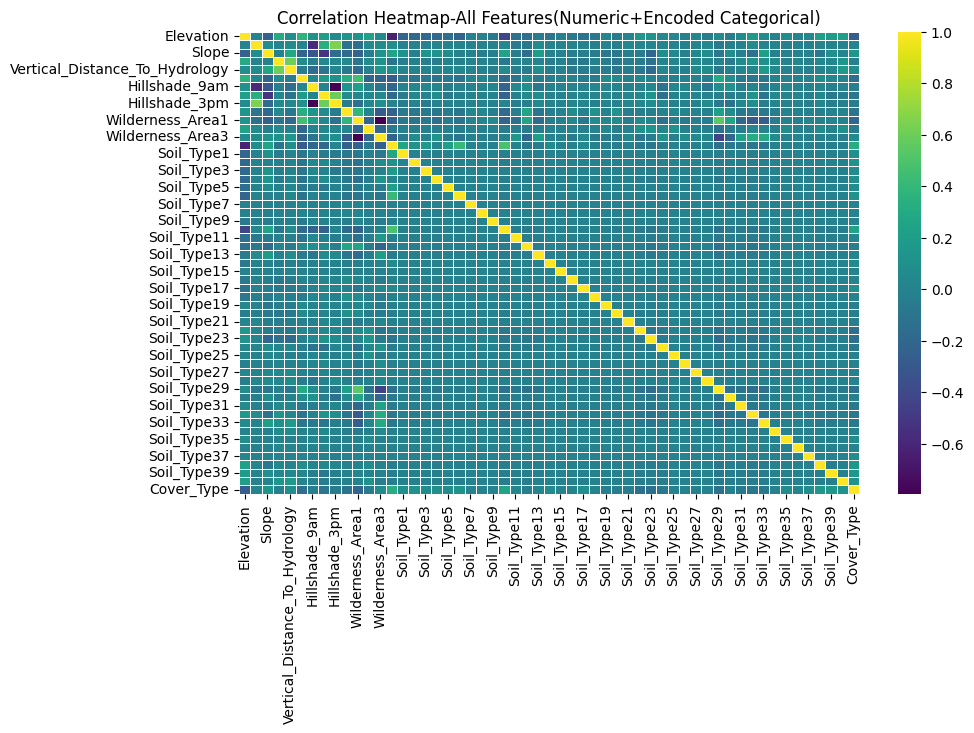

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [2]:
#Checking basic info
df.info()
print("Shape of Forest dataset is:",df.shape)
print("\nTarget variable distribution is:")
print(df['Cover_Type'].value_counts())

#Separating numeric and categorical columns
numeric_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
string_columns=df.select_dtypes(include=['object']).columns.tolist()
print("\nNumeric Columns:",numeric_columns)
print("Categorical Columns:",string_columns)

#Checking missing values
print("\nMissing Values per Column in the Forest Dataset:")
print(df.isnull().sum())

#Checking unique counts of numerical columns
if numeric_columns:
    print("\nUnique value counts (numerical columns):")
    print(df[numeric_columns].nunique())

#Checking unique counts of categorical columns
if string_columns:
    print("\nUnique value counts (categorical columns):")
    print(df[string_columns].nunique())

#Handling missing values
df[numeric_columns]=df[numeric_columns].apply(lambda x:x.fillna(x.mean()))
if string_columns:
    df[string_columns]=df[string_columns].apply(lambda x:x.fillna(x.mode()[0]))

# Dropping useless columns (only 1 unique value)
df = df.drop(columns=df.columns[df.nunique()==1])

# Resetting index after cleaning in same dataset
df.reset_index(drop=True,inplace=True)

#Shape of dataset after cleaning
print("\nShape after cleaning:",df.shape)

#Quick descriptive stats for dataset
print("\nStatistical summary of numeric features:")
print(df[numeric_columns].describe().T)

#Quantile distribution for numeric columns
print("\nQuantile distribution of numeric columns:")
print(df[numeric_columns].quantile([0.25,0.5,0.75]).T)

#Quantile Visualization using Seaborn ---

columns_visualize=[
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

num_plots=len(columns_visualize)
num_cols_per_row=3
num_rows=math.ceil(num_plots/num_cols_per_row)
plt.figure(figsize=(num_cols_per_row*7,num_rows*5)) 

for i,col in enumerate(columns_visualize):
    plt.subplot(num_rows,num_cols_per_row,i+1)
    sns.histplot(df[col],kde=True, bins=15,edgecolor='k')
    plt.title(f'{col} Data Distribution is:')
plt.tight_layout()
plt.show()

#--- Categorical Handling ---
if string_columns:
    encoder=OrdinalEncoder()
    df[string_columns]=encoder.fit_transform(df[string_columns])
    print("\nApplied Ordinal Encoding on Categorical columns.")

#Correlation heatmap (numeric + encoded categorical
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=False,cmap="viridis",linewidth=0.4)
plt.title("Correlation Heatmap-All Features(Numeric+Encoded Categorical)")
plt.show()

#Showing first 5 rows after preprocessing
df.head()


### 3. Training Multi-class Models

Random Forest Accuracy is: 0.561069306658038
              precision    recall  f1-score   support

           1       0.68      0.20      0.31     52960
           2       0.54      0.98      0.70     70825
           3       0.82      0.17      0.28      8938
           4       0.00      0.00      0.00       687
           5       0.00      0.00      0.00      2373
           6       0.00      0.00      0.00      4342
           7       0.00      0.00      0.00      5128

    accuracy                           0.56    145253
   macro avg       0.29      0.19      0.18    145253
weighted avg       0.56      0.56      0.47    145253

XGB Accuracy is: 0.8657445973577138
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     52960
           1       0.86      0.91      0.88     70825
           2       0.87      0.89      0.88      8938
           3       0.89      0.82      0.85       687
           4       0.93      0.45      0.60      23

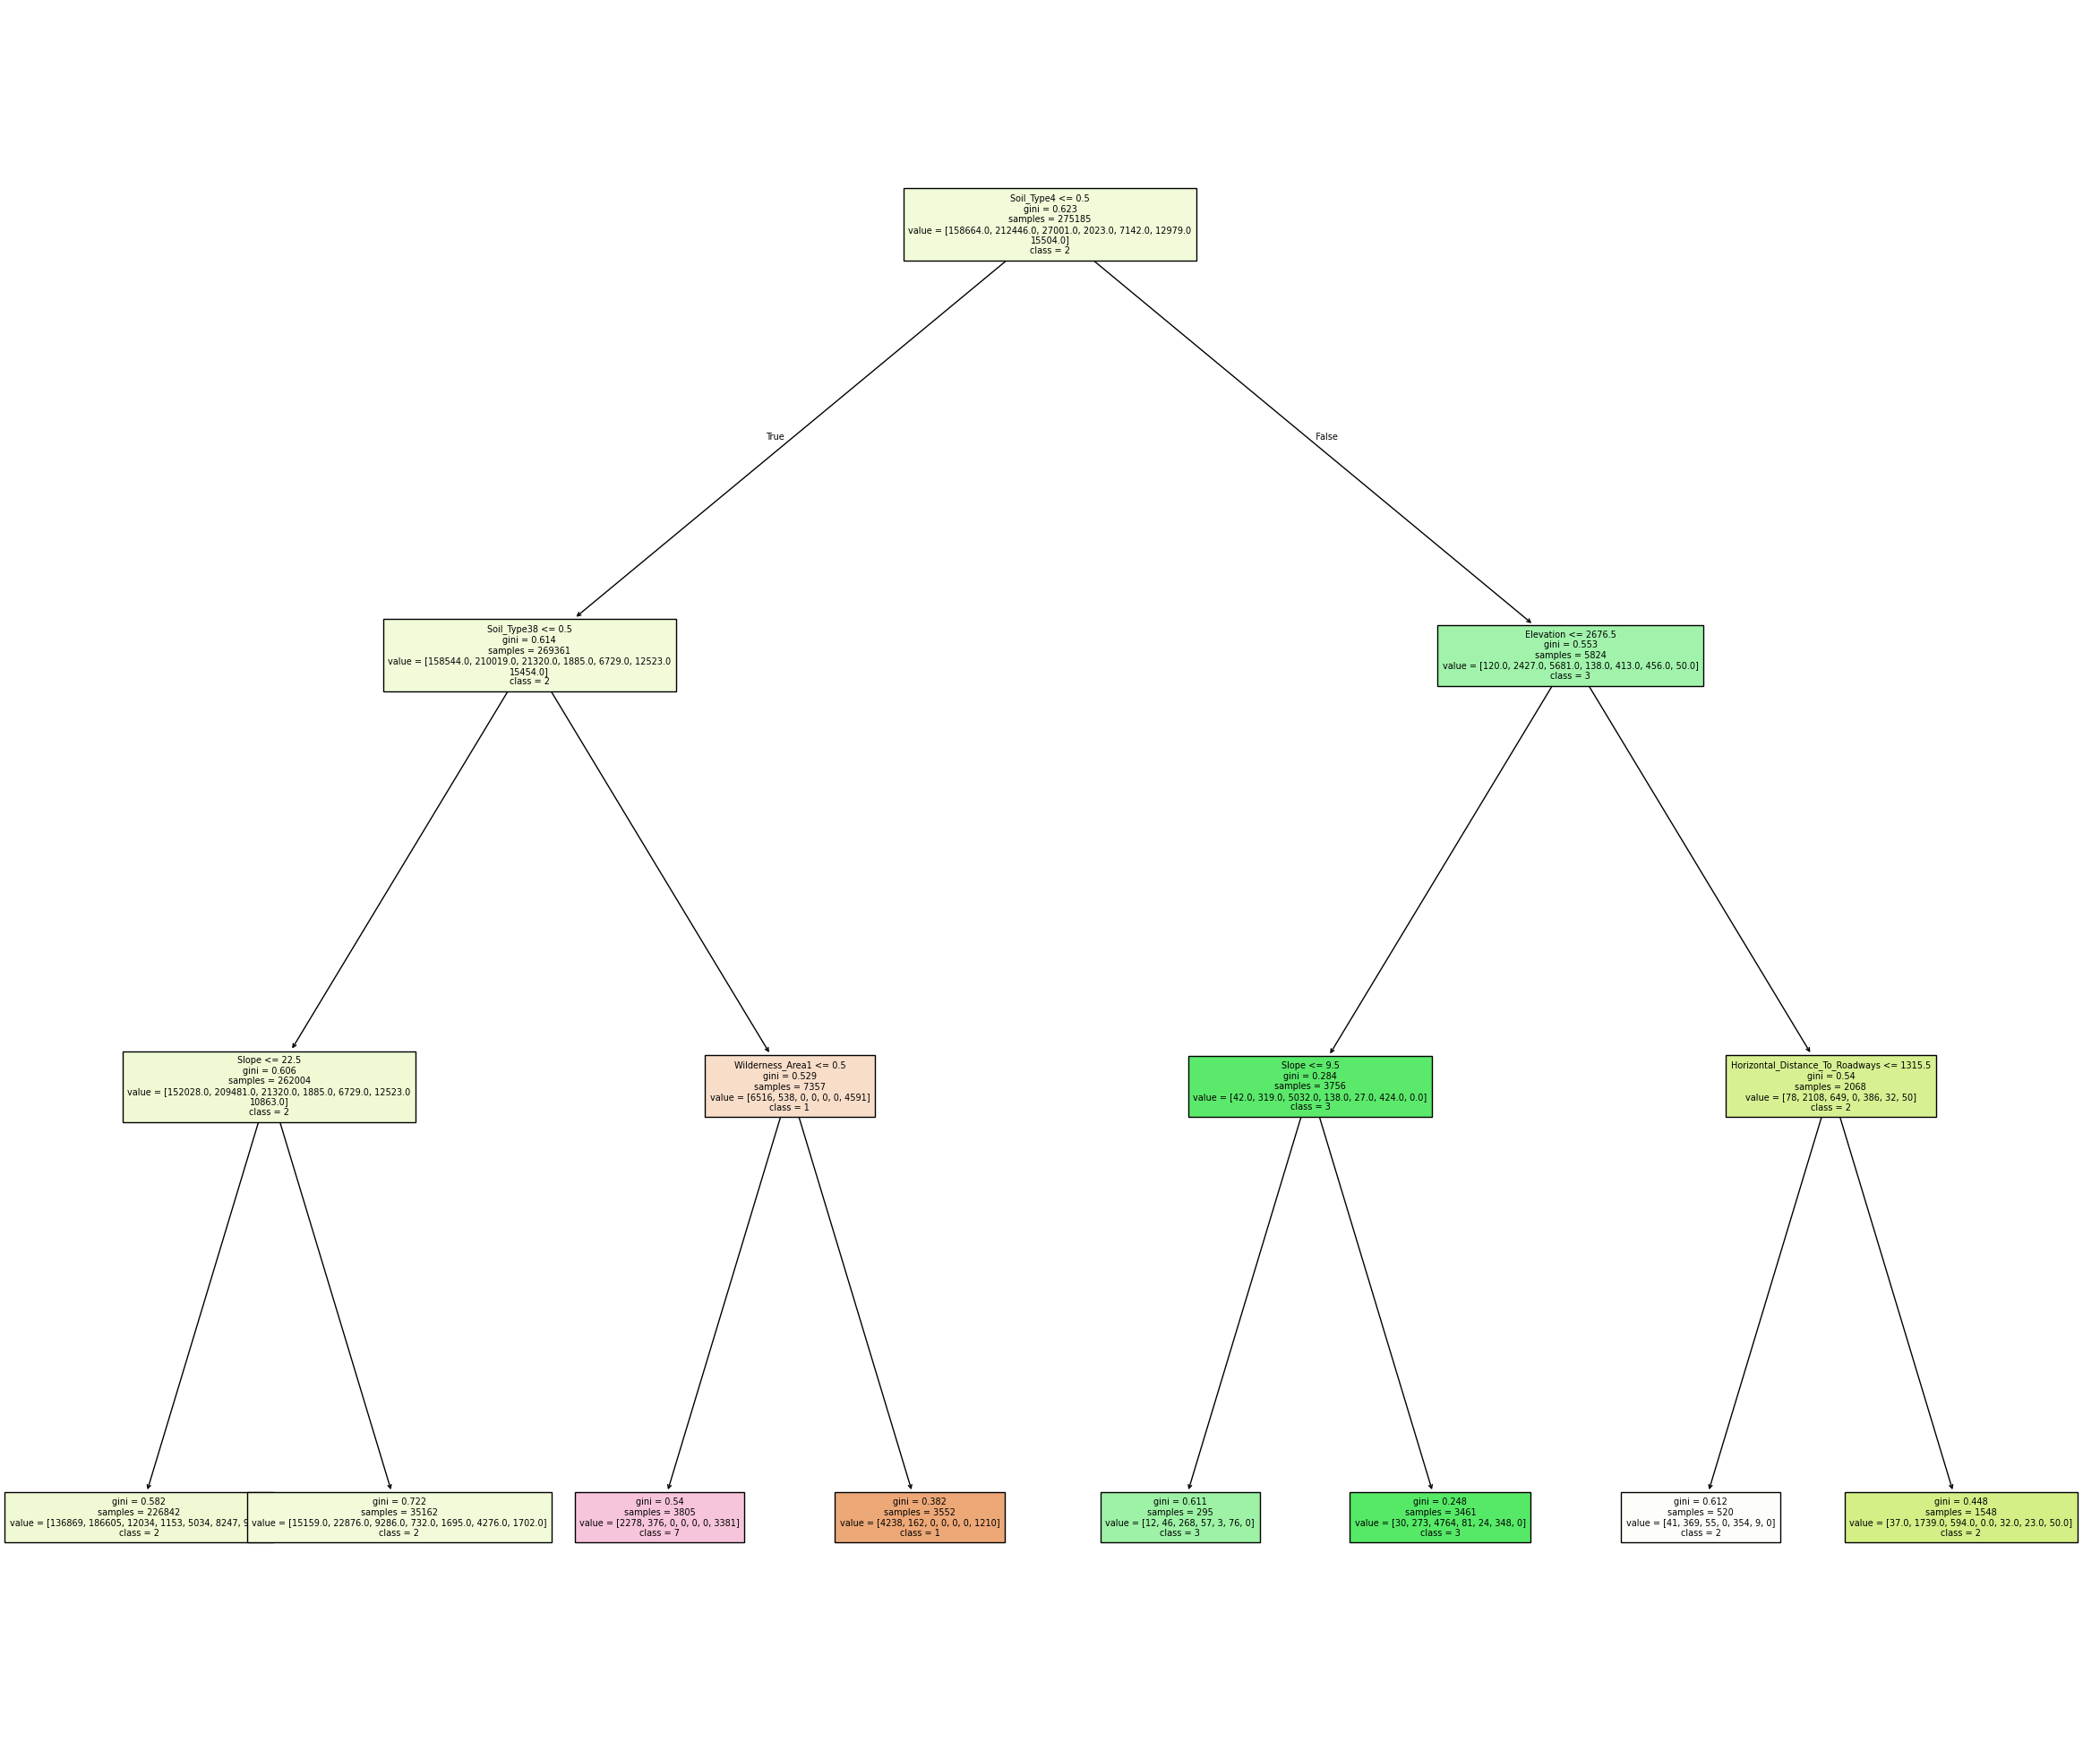

In [3]:
x = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

#scaler=StandardScaler()
#x_train_scaled=scaler.fit_transform(x_train)
#x_test_scaled=scaler.transform(x_test)

# Random Forest
randf=RandomForestClassifier(n_estimators=5,max_depth=3,random_state=42)
randf.fit(x_train,y_train)
y_pred_randf = randf.predict(x_test)

print("Random Forest Accuracy is:",accuracy_score(y_test,y_pred_randf))
print(classification_report(y_test,y_pred_randf))

# xgboost
labelencoder=LabelEncoder()
y_train_encoded=labelencoder.fit_transform(y_train) #for chaging 1-7 to 0-6
y_test_encoded=labelencoder.transform(y_test)
xgb=XGBClassifier(n_estimators=10,max_depth=10,random_state=42,use_label_encoder=False,eval_metric="mlogloss")
xgb.fit(x_train,y_train_encoded)
y_pred_xgb=xgb.predict(x_test)

print("XGB Accuracy is:",accuracy_score(y_test_encoded,y_pred_xgb))
print(classification_report(y_test_encoded,y_pred_xgb))

# Picking one tree from the RandomForest
estimator=randf.estimators_[0]

plt.figure(figsize=(30,25))
tree.plot_tree(estimator,feature_names=x.columns,class_names=[str(cls) for cls in randf.classes_],filled=True,fontsize=7)
plt.show()



### 4. Feature Importance

                               Columns  Importance
0                            Elevation    0.283025
51                         Soil_Type38    0.123926
23                         Soil_Type10    0.100463
17                          Soil_Type4    0.090555
35                         Soil_Type22    0.077570
52                         Soil_Type39    0.054345
19                          Soil_Type6    0.046607
5      Horizontal_Distance_To_Roadways    0.036590
25                         Soil_Type12    0.036409
53                         Soil_Type40    0.035768
2                                Slope    0.032181
10                    Wilderness_Area1    0.030142
11                    Wilderness_Area2    0.014703
26                         Soil_Type13    0.012104
9   Horizontal_Distance_To_Fire_Points    0.010794
3     Horizontal_Distance_To_Hydrology    0.004858
1                               Aspect    0.002705
31                         Soil_Type18    0.002270
8                        Hillsh

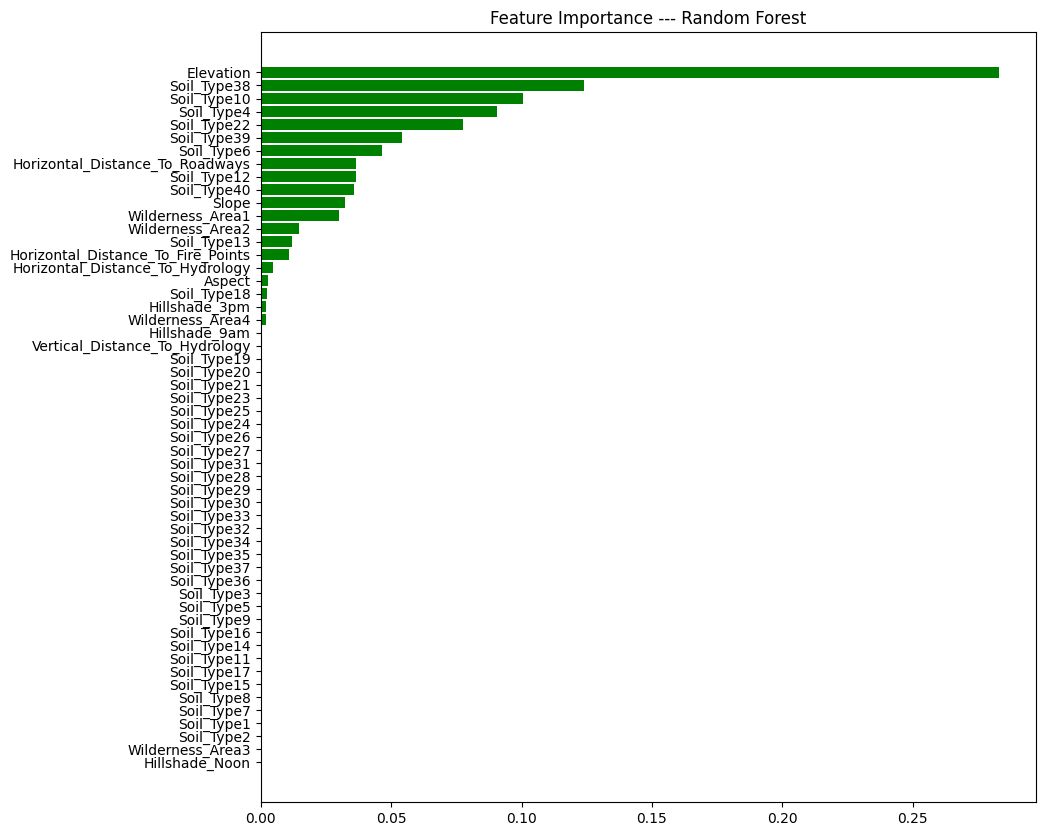

             Columns  Importance
0          Elevation    0.080576
50       Soil_Type37    0.071720
15        Soil_Type2    0.054871
10  Wilderness_Area1    0.053685
17        Soil_Type4    0.049352
35       Soil_Type22    0.045616
13  Wilderness_Area4    0.045174
45       Soil_Type32    0.044438
52       Soil_Type39    0.041115
25       Soil_Type12    0.038140
11  Wilderness_Area2    0.029122
12  Wilderness_Area3    0.027195
51       Soil_Type38    0.025089
40       Soil_Type27    0.024022
44       Soil_Type31    0.021746
36       Soil_Type23    0.021099
42       Soil_Type29    0.020404
16        Soil_Type3    0.020250
34       Soil_Type21    0.019829
46       Soil_Type33    0.017754


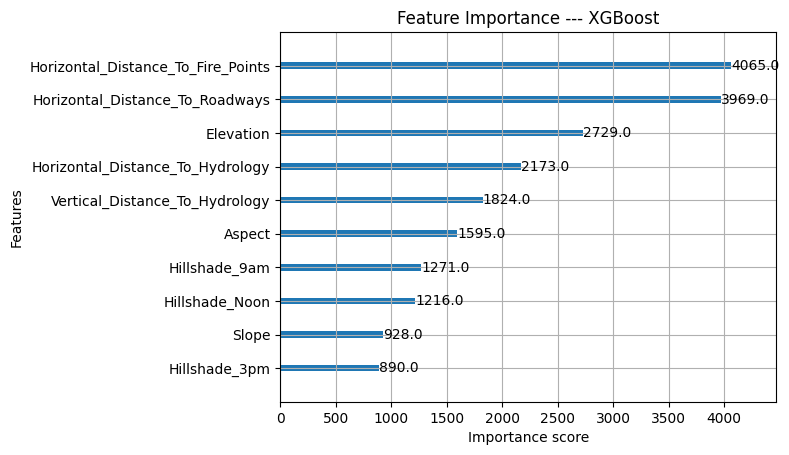

In [4]:
### for random forest
feat_imp_randf_dataset=pd.DataFrame({'Columns':x.columns,'Importance':randf.feature_importances_})
print(feat_imp_randf_dataset.sort_values(by='Importance',ascending=False).head(20))
feat_imp_randf_dataset=feat_imp_randf_dataset.sort_values(by='Importance',ascending=True).reset_index(drop=True)

plt.figure(figsize=(10,10))
plt.barh(feat_imp_randf_dataset['Columns'],feat_imp_randf_dataset['Importance'],color='green')
plt.title('Feature Importance --- Random Forest')
plt.show()

### for xgboost
feat_imp_xgb_dataset=pd.DataFrame({'Columns':x.columns,'Importance':xgb.feature_importances_})
print(feat_imp_xgb_dataset.sort_values(by='Importance',ascending=False).head(20))
plot_importance(xgb,importance_type='weight',max_num_features=10)
plt.title('Feature Importance --- XGBoost')
plt.show()




### 5. Confusion Matrix

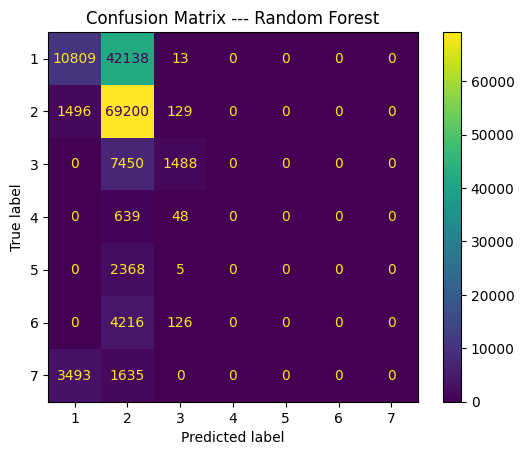

<Figure size 2000x1000 with 0 Axes>

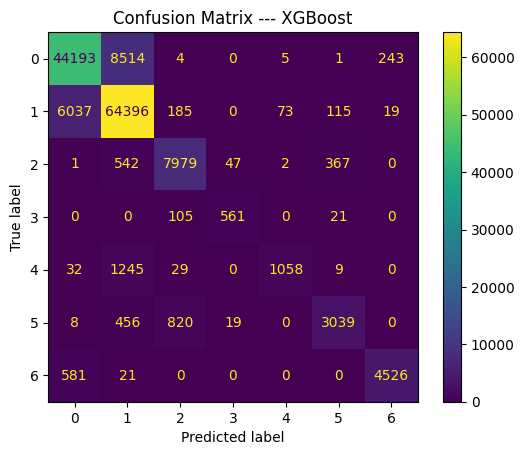

<Figure size 2000x1000 with 0 Axes>

In [5]:
cm_randf=confusion_matrix(y_test,y_pred_randf)
disp_randf=ConfusionMatrixDisplay(confusion_matrix=cm_randf,display_labels=randf.classes_)
disp_randf.plot(cmap='viridis')
plt.title('Confusion Matrix --- Random Forest')
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

cm_xgb=confusion_matrix(y_test_encoded,y_pred_xgb)
disp_xgb=ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=xgb.classes_)
disp_xgb.plot(cmap='viridis')
plt.title('Confusion Matrix --- XGBoost')
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()


### 6. Hyperparameter Tuning

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   3.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   3.0s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   2.3s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   2.3s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=4, min_sam

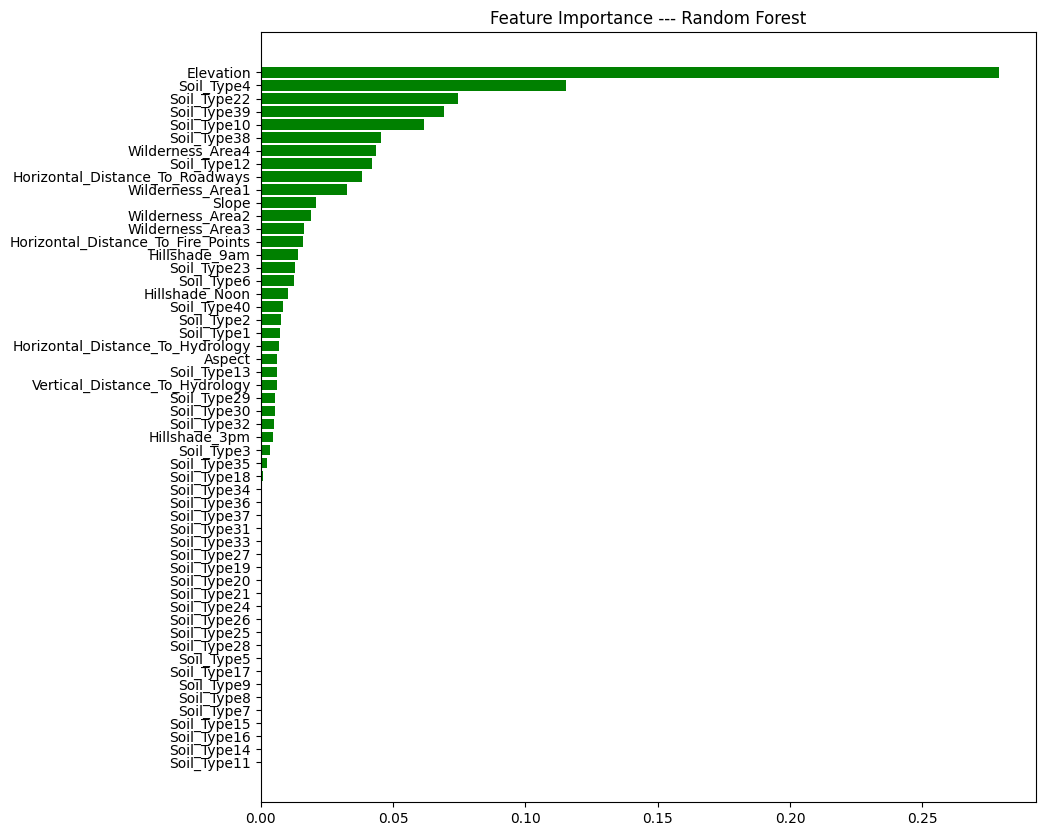

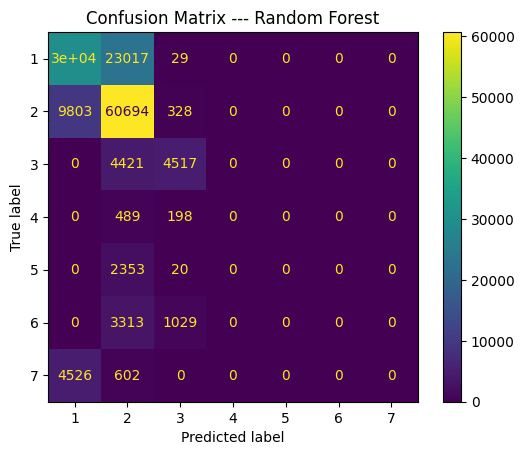

<Figure size 2000x1000 with 0 Axes>

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   9.4s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=  10.4s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=  11.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.7; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.7; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=10, subsample=0.7; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=10, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=10, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=10, subsample=1.0; total time=   2.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=10, subsample=0.5; total time=   3.1s
[CV] END learning_ra

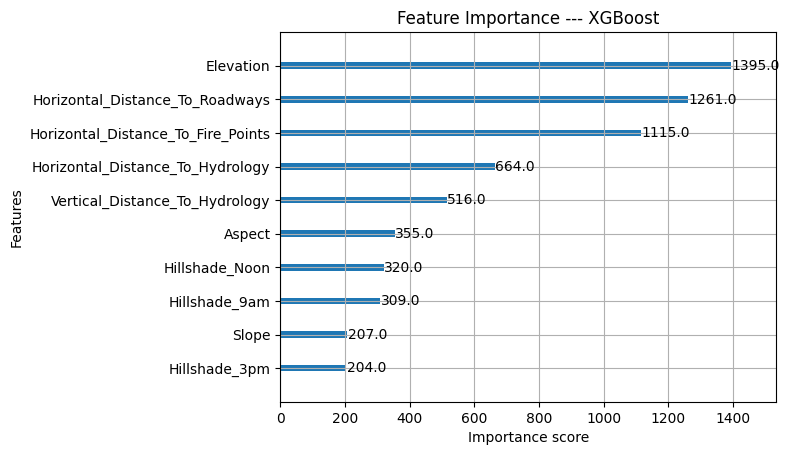

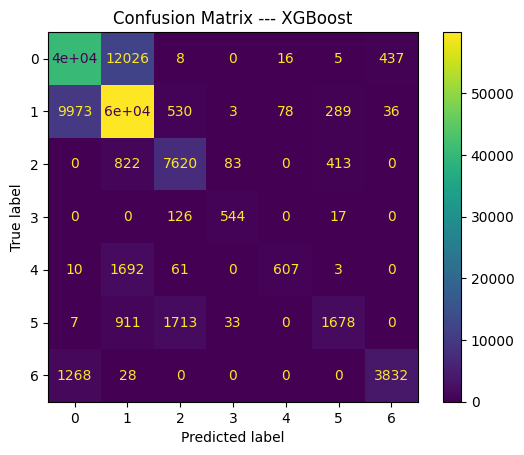

<Figure size 2000x1000 with 0 Axes>

In [6]:
randf_params={"n_estimators": [5, 10],
              "max_depth": [3, 5],
              "min_samples_split": [2,5,10],
              "min_samples_leaf": [1,2,4]}

randf=RandomForestClassifier(random_state=42)
randf_rand_search=RandomizedSearchCV(estimator=randf,param_distributions=randf_params,n_iter=5,cv=3,verbose=2,n_jobs=+1,scoring='accuracy',random_state=42)
randf_rand_search.fit(x_train,y_train)
randf_rand_search_best_est=randf_rand_search.best_estimator_
y_pred_randf_best=randf_rand_search_best_est.predict(x_test)

print("Random Forest Metrics:")
print("Random Forest Best Estimator Accuracy:",accuracy_score(y_test,y_pred_randf_best))
print("Random Forest Best Estimator Classification Report:",classification_report(y_test,y_pred_randf_best))
print("Random Forest Best Estimator Confusion Matrix:",confusion_matrix(y_test,y_pred_randf_best))

feat_imp_randf_dataset=pd.DataFrame({'Columns':x.columns,'Importance':randf_rand_search_best_est.feature_importances_})
print(feat_imp_randf_dataset.sort_values(by='Importance',ascending=False).head(20))
feat_imp_randf_dataset=feat_imp_randf_dataset.sort_values(by='Importance',ascending=True).reset_index(drop=True)

plt.figure(figsize=(10,10))
plt.barh(feat_imp_randf_dataset['Columns'],feat_imp_randf_dataset['Importance'],color='green')
plt.title('Feature Importance --- Random Forest')
plt.show()

cm_randf=confusion_matrix(y_test,y_pred_randf_best)
disp_randf=ConfusionMatrixDisplay(confusion_matrix=cm_randf,display_labels=randf_rand_search_best_est.classes_)
disp_randf.plot(cmap='viridis')
plt.title('Confusion Matrix --- Random Forest')
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()


### now hyperparameter tuning for xgboost
xgb_params={"n_estimators":[10,50],
           "max_depth":[3,5],
           "learning_rate": [0.01,0.1,0.2],
           "subsample": [0.5,0.7,1.0]}

xgb=XGBClassifier(eval_metric="mlogloss",use_label_encoder=False,random_state=42)
xgb_rand_search=RandomizedSearchCV(estimator=xgb,param_distributions=xgb_params,n_iter=5,cv=3,verbose=2,n_jobs=+1,scoring='accuracy',random_state=42)
xgb_rand_search.fit(x_train,y_train_encoded)
xgb_rand_search_best_est=xgb_rand_search.best_estimator_
y_pred_xgb_best=xgb_rand_search_best_est.predict(x_test)

print("XGBoost Metrics:")
print("XGBoost Best Estimator Accuracy:",accuracy_score(y_test_encoded,y_pred_xgb_best))
print("XGBoost Best Estimator Classification Report:",classification_report(y_test_encoded,y_pred_xgb_best))
print("XGBoost Best Estimator Confusion Matrix:",confusion_matrix(y_test_encoded,y_pred_xgb_best))

feat_imp_xgb_dataset=pd.DataFrame({'Columns':x.columns,'Importance':xgb_rand_search_best_est.feature_importances_})
print(feat_imp_xgb_dataset.sort_values(by='Importance',ascending=False).head(20))
plot_importance(xgb_rand_search_best_est,importance_type='weight',max_num_features=10)
plt.title('Feature Importance --- XGBoost')
plt.show()

cm_xgb=confusion_matrix(y_test_encoded,y_pred_xgb_best)
disp_xgb=ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=xgb_rand_search_best_est.classes_)
disp_xgb.plot(cmap='viridis')
plt.title('Confusion Matrix --- XGBoost')
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()




### 7. Outcomes

### XGBoost outperformed Random Forest in predicting forest cover types. Initially, XGBoost achieved 86.6% accuracy with balanced predictions across all seven classes, whereas Random Forest only reached 56.1% and struggled with minority classes. After hyperparameter tuning, Random Forest improved to 65.5%, but XGBoost still showed better overall performance despite a slight drop to 78.9%. Both models highlighted Elevation and certain Soil_Type features as most important, yet XGBoost handled class imbalance and minority classes more effectively. Overall, XGBoost proved to be the more reliable and accurate model for this multiclass classification problem.